In [1]:
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchsummary import summary


In [2]:
def nlfunction(x):
    return (x**3 + 2*x**2 + 3*x + 1)

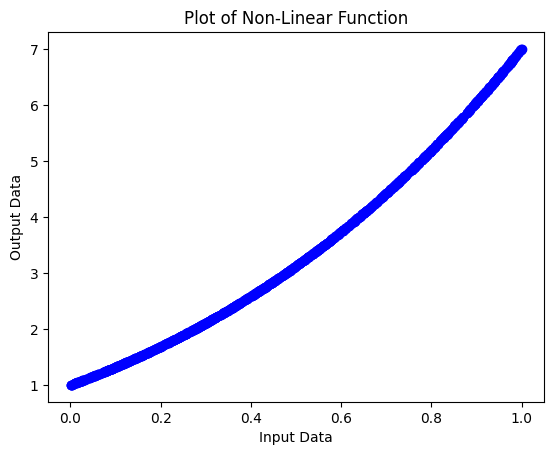

In [3]:
# Generate random input data
input_data = torch.rand((1000, 1))
output_data = nlfunction(input_data)
input_data_np = input_data.numpy()
output_data_np = output_data.numpy()

# Plot the result
plt.plot(input_data_np, output_data_np, 'bo')
plt.xlabel("Input Data")
plt.ylabel("Output Data")
plt.title("Plot of Non-Linear Function")
plt.show()

In [4]:
class simpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1, 250)  # Input layer to hidden layer with 250 units
        self.layer2 = nn.Linear(250, 1)  # Hidden layer to output
        
    def forward(self, input_tensor):
        # Apply ReLU activation to the hidden layer
        input_tensor = F.relu(self.layer1(input_tensor))
        # Output layer
        output_tensor = self.layer2(input_tensor)
        
        return output_tensor


In [5]:
class complexNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1, 60)   # Input layer to first hidden layer
        self.layer2 = nn.Linear(60, 40)  # First hidden layer to second hidden layer
        self.layer3 = nn.Linear(40, 20)  # Second hidden layer to third hidden layer
        self.layer4 = nn.Linear(20, 1)   # Third hidden layer to output
        
    def forward(self, input_tensor):
        # Apply ReLU activation at each hidden layer
        input_tensor = F.relu(self.layer1(input_tensor))
        input_tensor = F.relu(self.layer2(input_tensor))
        input_tensor = F.relu(self.layer3(input_tensor))
        
        # Output layer
        output_tensor = self.layer4(input_tensor)
        
        return output_tensor


In [6]:
class deepNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1, 50)  # Input layer to first hidden layer
        self.layer2 = nn.Linear(50, 40) # First hidden layer to second hidden layer
        self.layer3 = nn.Linear(40, 30) # Second hidden layer to third hidden layer
        self.layer4 = nn.Linear(30, 20) # Third hidden layer to fourth hidden layer
        self.layer5 = nn.Linear(20, 10) # Fourth hidden layer to fifth hidden layer
        self.layer6 = nn.Linear(10, 1)  # Fifth hidden layer to output
        
    def forward(self, input_tensor):
        input_tensor = F.relu(self.layer1(input_tensor))
        input_tensor = F.relu(self.layer2(input_tensor))
        input_tensor = F.relu(self.layer3(input_tensor))
        input_tensor = F.relu(self.layer4(input_tensor))
        input_tensor = F.relu(self.layer5(input_tensor))
        
        # Output layer
        output_tensor = self.layer6(input_tensor)
        
        return output_tensor


In [7]:
# Initialize the model
model_1 = simpleNN()

# Display model summary
summary(model_1, (1,))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 250]             500
            Linear-2                    [-1, 1]             251
Total params: 751
Trainable params: 751
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [8]:
# Initialize the model
model_2 = complexNN()

# Display model summary
summary(model_2, (1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 60]             120
            Linear-2                   [-1, 40]           2,440
            Linear-3                   [-1, 20]             820
            Linear-4                    [-1, 1]              21
Total params: 3,401
Trainable params: 3,401
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [9]:
# Initialize the model
model_3 = deepNN()

# Display model summary
summary(model_3, (1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 50]             100
            Linear-2                   [-1, 40]           2,040
            Linear-3                   [-1, 30]           1,230
            Linear-4                   [-1, 20]             620
            Linear-5                   [-1, 10]             210
            Linear-6                    [-1, 1]              11
Total params: 4,211
Trainable params: 4,211
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


In [10]:
lossFunc = nn.MSELoss()

In [11]:
# Initialize the models
model_4 = simpleNN()     # renamed from firstModel
model_5 = complexNN()    # renamed from secondModel
model_6 = deepNN()       # renamed from thirdModel

# Initialize the optimizers for each model
optimizer_model_4 = optim.SGD(model_4.parameters(), lr=0.001)
optimizer_model_5 = optim.SGD(model_5.parameters(), lr=0.001)
optimizer_model_6 = optim.SGD(model_6.parameters(), lr=0.001)


In [12]:
# Define the optimizers for each model
optimizer_model_1 = optim.SGD(model_1.parameters(), lr=0.001)
optimizer_model_2 = optim.SGD(model_2.parameters(), lr=0.001)
optimizer_model_3 = optim.SGD(model_3.parameters(), lr=0.001)

# Number of epochs for training
EPOCHS = 1000

# List to store the cost (loss) for model 1
model_1_costs = []

# Training loop for model 1
for epoch in range(EPOCHS):
    output = model_1.forward(input_data)
    cost = lossFunc(output, output_data)
    cost.backward()
    optimizer_model_1.step()
    model_1.zero_grad()
    model_1_costs.append(cost.detach().numpy())
    
    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}: Loss - {cost.item():.3f}')


Epoch 100: Loss - 0.711
Epoch 200: Loss - 0.324
Epoch 300: Loss - 0.166
Epoch 400: Loss - 0.101
Epoch 500: Loss - 0.075
Epoch 600: Loss - 0.064
Epoch 700: Loss - 0.058
Epoch 800: Loss - 0.055
Epoch 900: Loss - 0.053
Epoch 1000: Loss - 0.052


In [13]:
# List to store the cost (loss) for model 2
model_2_costs = []

# Training loop for model 2
for epoch in range(EPOCHS):
    model_2.zero_grad()
    output = model_2(input_data)
    cost = lossFunc(output, output_data)
    model_2_costs.append(cost.detach().numpy())
    cost.backward()
    optimizer_model_2.step()
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}: Loss - {cost.item():.3f}')


Epoch 100: Loss - 4.035
Epoch 200: Loss - 1.199
Epoch 300: Loss - 0.861
Epoch 400: Loss - 0.562
Epoch 500: Loss - 0.331
Epoch 600: Loss - 0.180
Epoch 700: Loss - 0.097
Epoch 800: Loss - 0.058
Epoch 900: Loss - 0.042
Epoch 1000: Loss - 0.034


In [14]:
model_3_costs = []

for epoch in range(EPOCHS):
    model_3.zero_grad()
    output = model_3(input_data)
    cost = lossFunc(output, output_data)
    model_3_costs.append(cost.detach().numpy())
    cost.backward()
    optimizer_model_3.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}: Loss - {cost.item():.3f}')


Epoch 100: Loss - 9.306
Epoch 200: Loss - 6.176
Epoch 300: Loss - 3.943
Epoch 400: Loss - 2.885
Epoch 500: Loss - 2.611
Epoch 600: Loss - 2.428
Epoch 700: Loss - 2.149
Epoch 800: Loss - 1.712
Epoch 900: Loss - 1.116
Epoch 1000: Loss - 0.552


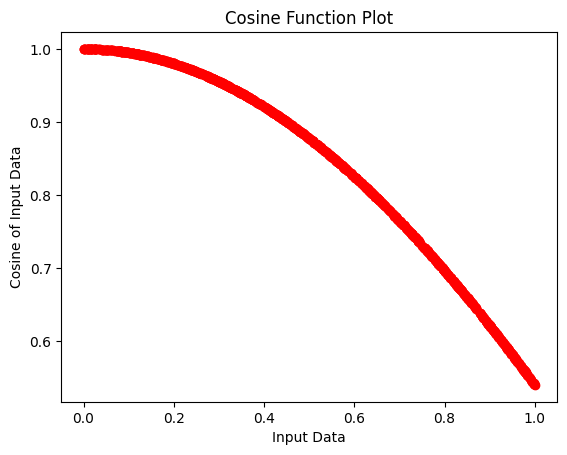

In [15]:
# Compute output using cosine function on input_data
output_data_1 = torch.cos(input_data)

# Plot the input_data vs output_data_1
plt.plot(input_data, output_data_1, 'ro')
plt.xlabel("Input Data")
plt.ylabel("Cosine of Input Data")
plt.title("Cosine Function Plot")
plt.show()


In [16]:
EPOCHS = 1000

# Model 4 training loop
model_4_costs = []
for epoch in range(EPOCHS):
    model_4.zero_grad()
    output = model_4(input_data)
    cost = lossFunc(output, output_data_1)
    model_4_costs.append(cost.detach().numpy())
    cost.backward()
    optimizer_model_4.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}: Loss - {cost.item():.3f}')

# Model 5 training loop
model_5_costs = []
for epoch in range(EPOCHS):
    model_5.zero_grad()
    output = model_5(input_data)
    cost = lossFunc(output, output_data_1)
    model_5_costs.append(cost.detach().numpy())
    cost.backward()
    optimizer_model_5.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}: Loss - {cost.item():.3f}')

# Model 6 training loop
model_6_costs = []
for epoch in range(EPOCHS):
    model_6.zero_grad()
    output = model_6(input_data)
    cost = lossFunc(output, output_data_1)
    model_6_costs.append(cost.detach().numpy())
    cost.backward()
    optimizer_model_6.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}: Loss - {cost.item():.3f}')


Epoch 100: Loss - 0.010
Epoch 200: Loss - 0.006
Epoch 300: Loss - 0.004
Epoch 400: Loss - 0.004
Epoch 500: Loss - 0.003
Epoch 600: Loss - 0.003
Epoch 700: Loss - 0.003
Epoch 800: Loss - 0.003
Epoch 900: Loss - 0.003
Epoch 1000: Loss - 0.003
Epoch 100: Loss - 0.482
Epoch 200: Loss - 0.241
Epoch 300: Loss - 0.111
Epoch 400: Loss - 0.052
Epoch 500: Loss - 0.029
Epoch 600: Loss - 0.021
Epoch 700: Loss - 0.018
Epoch 800: Loss - 0.017
Epoch 900: Loss - 0.017
Epoch 1000: Loss - 0.016
Epoch 100: Loss - 0.263
Epoch 200: Loss - 0.164
Epoch 300: Loss - 0.104
Epoch 400: Loss - 0.068
Epoch 500: Loss - 0.046
Epoch 600: Loss - 0.034
Epoch 700: Loss - 0.028
Epoch 800: Loss - 0.024
Epoch 900: Loss - 0.022
Epoch 1000: Loss - 0.021


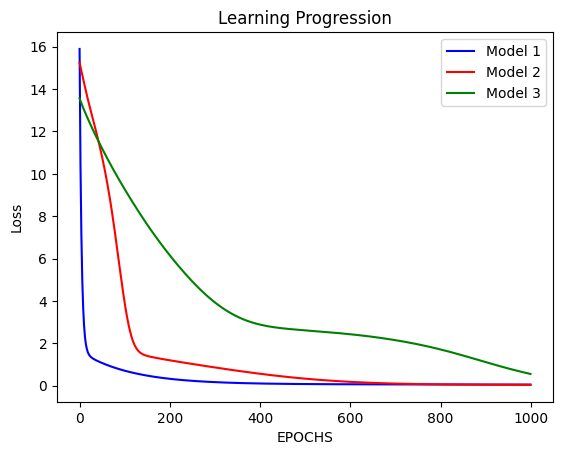

In [17]:
plt.plot(range(EPOCHS), model_1_costs, 'b', label='Model 1')
plt.plot(range(EPOCHS), model_2_costs, 'r', label='Model 2')
plt.plot(range(EPOCHS), model_3_costs, 'g', label='Model 3')
plt.title("Learning Progression")
plt.xlabel("EPOCHS")
plt.ylabel("Loss")
plt.legend()
plt.show()


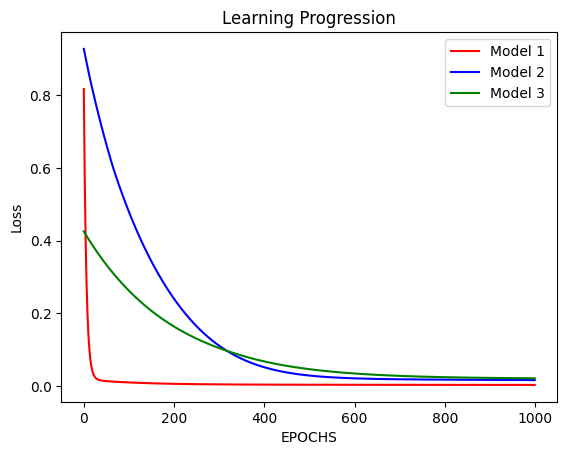

In [18]:
plt.plot(range(EPOCHS), model_4_costs, 'r', label='Model 1')
plt.plot(range(EPOCHS), model_5_costs, 'b', label='Model 2')
plt.plot(range(EPOCHS), model_6_costs, 'g', label='Model 3')
plt.title("Learning Progression")
plt.xlabel("EPOCHS")
plt.ylabel("Loss")
plt.legend()
plt.show()


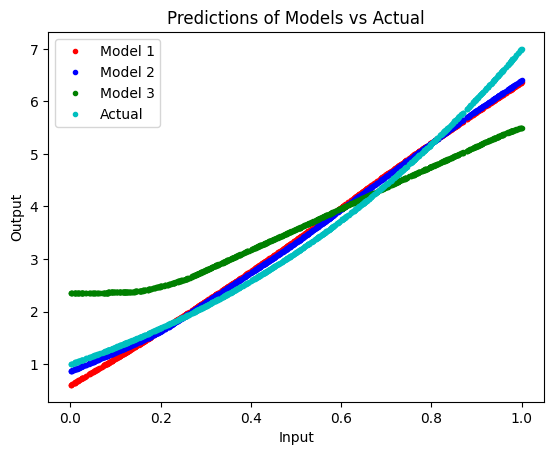

In [19]:
# Generate predictions for all models
model_1_pred = model_1(input_data)
model_2_pred = model_2(input_data)
model_3_pred = model_3(input_data)

# Plot the predictions and actual data
plt.plot(input_data.tolist(), model_1_pred.tolist(), 'r.', label='Model 1')
plt.plot(input_data.tolist(), model_2_pred.tolist(), 'b.', label='Model 2')
plt.plot(input_data.tolist(), model_3_pred.tolist(), 'g.', label='Model 3')
plt.plot(input_data.tolist(), output_data.tolist(), 'c.', label='Actual')
plt.title("Predictions of Models vs Actual")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.show()


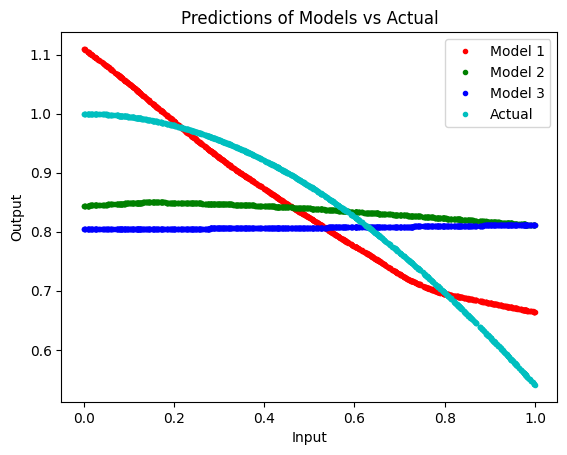

In [20]:
# Generate predictions for models 4, 5, and 6
model_4_pred = model_4(input_data)
model_5_pred = model_5(input_data)
model_6_pred = model_6(input_data)

# Plot the predictions and actual data
plt.plot(input_data.tolist(), model_4_pred.tolist(), 'r.', label='Model 1')
plt.plot(input_data.tolist(), model_5_pred.tolist(), 'g.', label='Model 2')
plt.plot(input_data.tolist(), model_6_pred.tolist(), 'b.', label='Model 3')
plt.plot(input_data.tolist(), output_data_1.tolist(), 'c.', label='Actual')
plt.title("Predictions of Models vs Actual")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.show()
